## Laboratorio 1 - Parte 2

### Regresión logística y Funciones Discriminantes Gausianas

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [2]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded
/?code=4/OgAmZEtvp3NxQg4QXbcDPVDo4fxVXyH3bNBDOzllUbsOn9vtfDWRFGqjioW6gALPCnjqhN_158dC4eJKjm6ZiyQ


,davida.marin@udea.edu.coDAVID ALEJANDRO MARÍN ALZATEgoogle id: 100532802635099902978


### Segunda integrante
 Deiry Sofía Navas Muriel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Ejercicio 1

En este laboratorio se va a realizar un procedimiento análogo al del laboratorio anterior, pero con el modelo de regresión logística que sirve para resolver problemas de clasificación (en principio biclase).

Analice los siguientes métodos a la luz de la teoría vista para el modelo de regresión logística. Una vez comprenda su funcionamiento proceda a completar el código del método de gradiente descendente con la regla de actualización de los parámetros

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

Para el problema de clasificación. Tenga presente que si ya implementó la regla de actualización de parámetros para el modelo de regresión polinomial múltiple, este punto es trivial, ya que solo tiene que incluir la función sigmoidal tal como lo vimos en la teoría.

Además se pide graficar el error de clasificación durante las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

Nota: observe que el método logistic_regression ya hace el llamado a la función sigmoidal

In [2]:
#Sigmoidal
def sigmoidal(z):
    
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    # s = 1/(1+np.exp(-z))
    s = np.exp(z)/(1+np.exp(z))
    
    #Complete el código para realizar la gráfica de la función aquí
    #u = np.linspace(-10,10,100)
    #plt.plot(u,s)
    #plt.show()
    return s


#Modelo Regresión logística
def logistic_regression(X, W):
    Yest = np.dot(X,W)  #con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Y_lest = sigmoidal(Yest)
    
    #Se llevan los valores a 1 o 0 para los que está definido el modelo de regresión logística
    pos = 0
    for tag in Y_lest:
        
        if tag > 0.5:
            Y_lest[pos] = 1
        elif tag < 0.5:
            Y_lest[pos] = 0
        
        pos += 1
    
    return Y_lest    #Esta variable contiene la salida de sigm(f(X,W))


#Potencia de polinomio (En es laboratorio solo trabajaremos el caso lineal (grado 1), pero se pueden probar otras fronteras)
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


#Para calcular el error del modelo de regresión logística
def error_logistic(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    #print "La eficiencia en esta iteración fue: "+str(1-error)+'\n'
    
    return error

#Gradiente descendente para regresión logística
def gradiente_descendente_logistic(X,Y,grado,eta):
    
    #X es la matriz de datos extendida. W es el vector de parámetros del modelo
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenar el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)

    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    #Inicializamos el vector de parámetros aleatoriamente
    #Want = np.random.randn(d)
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)

    eta = eta
    
    iteraciones = 1000
    errores = np.zeros(iteraciones)
    
    for iter in range(iteraciones):

        Y_estimado = logistic_regression(X,W)
        #Error en clasificación
        error = error_logistic(Y_estimado,Y)
        errores[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: Want, X, Y
        
        for j in range(0, d):
            s = 0
            for i in range(0, N):
                s +=  sigmoidal( np.dot(X[i,:],W) - Y[i] ) * X[i,j]
            W[j] = W[j] - eta * (s / N)
            
        #se imprime cada 100 iteracciones el error    
        if iter%100 == 0 or iter == 0:
            print("Iteración: ",iter," ECM: ",errores[iter])
      
            
    
    #Aquí debe completar el código para realizar la gráfica del error de clasificación vs. iteraciones
    plt.plot(errores, color='green')
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.xlim(0,iteraciones)
    plt.show()
   
    
    
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError de entrenamiento = ' + str(errores[-1]))
 
    
    return W

## Ejercicio 2

A continuación se leen los datos de un problema de clasificación. Las variables o caracterísicas son guardadas en la variable X y la variable de salida es guardada en la variable Y. Grafique los datos usando la funci&oacute;n scatter de matplotlib y responda a las siguientes preguntas:

In [3]:
import scipy.io
mat = scipy.io.loadmat('DB/DatosClases.mat')
X = mat['X'] # Muestras x características
Y = mat['Y'] #Variable de salida

/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


2.1 Cu&aacute;ntas clases tiene el problema?:

In [9]:
print(Y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


2.2 Cu&aacute;ntas caracter&iacute;sticas tiene el problema?:

In [55]:
np.size(X,1)

2

2.3 Cu&aacute;ntas muestras tiene el problema?:

In [56]:
np.size(X,0)

500

2.4 El problema es linealmente separable?:

## Ejercicio 3

Complete el código de la siguiente celda llamando el método gradiente_descendente_logistic y pasándole los parámetros correspondientes, de acuerdo con los parámetros que indica la tabla de resultados, ejecute el entrenamiento y llene la tabla de resultados.

Iteración:  0  ECM:  1.0
Iteración:  100  ECM:  0.5
Iteración:  200  ECM:  0.5
Iteración:  300  ECM:  0.5
Iteración:  400  ECM:  0.5
Iteración:  500  ECM:  0.5
Iteración:  600  ECM:  0.5
Iteración:  700  ECM:  0.5
Iteración:  800  ECM:  0.5
Iteración:  900  ECM:  0.5
Vector de parámetros del modelo:

[[-6.41977060e+00]
 [-3.84826708e-03]
 [ 9.35217894e-03]
 [ 3.53807498e-01]
 [ 3.57790273e-01]
 [-1.73819834e-03]
 [ 3.15580919e-04]]

Error de entrenamiento = 0.5


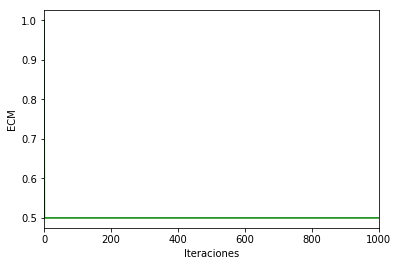


Error durante la prueba = 0.5


In [59]:
from numpy import random
import math
N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 3
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 1

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
W = gradiente_descendente_logistic(Xtrain, Ytrain, grado, eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest2 = np.concatenate((unos.T, Xtest), axis=1)
Xtest2 = Xtest2.reshape(np.size(Xtest2,0),np.size(Xtest2,1))
Yest = logistic_regression(Xtest2, W)
Error = error_logistic(Yest,Ytest)
print('\nError durante la prueba = ' + str(Error))

#### Tabla de resultados

In [40]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1', '1', '1', '1', '1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.001', '0.001', '0.001', '0.001', '0.001']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["Error_Entrenamiento"] = ""
df_types["Error_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["Error_Entrenamiento"][2] = "0.0"
df_types["Error_Prueba"][2] = "0.5"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [41]:
qgrid_widget.get_changed_df()

Error_Entrenamiento Error_Prueba
Tasa de aprendizaje Grado del polinomio                                 
1                   1                                                   
                    2                                                   
                    3                                   0.0          0.5
                    4                                                   
                    5                                                   
0.1                 1                                                   
                    2                                                   
                    3                                                   
                    4                                                   
                    5                                                   
0.001               1                                                   
                    2                                                   
                    3                                                   
                    4                                                   
                    5

## Ejercicio 4

4.1 Escriba el modelo $f(\textbf{x},\textbf{w})$, de la mejor frontera de decisión que encontró según la tabla de resultados.

4.2 Basado en el valor del error obtenido, ¿cu&aacute;ntas muestras de entrenamiento y de prueba clasifica mal el modelo? (un valor para cada conjunto). Nota. Escriba en una celda el código con el cuál obtuvo la respuesta.

## Ejercicio 5

El siguiente código utiliza un clasificador basado en Funciones Discriminantes Gaussianas para resolver el mismo problema de clasificación. Ejecute el código y responda las siguientes preguntas:

In [60]:
def DistribucionGaussiana(X,Mu,Sigma):
    
    SigmaInversa = np.linalg.inv(np.array(Sigma))
    PrimerTermino = (1/(2*math.pi*math.sqrt(np.linalg.det(Sigma))))
    
    primerDot = np.dot((X-Mu),SigmaInversa)
    segundoDot = np.dot(primerDot,(X-Mu).T)
    Exponencial = math.exp(-0.5*segundoDot)
    
    Probabilidad = PrimerTermino * Exponencial
    
    return Probabilidad

def FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo):
    
    N = Xtest.shape[0]
    #Estimación de medias y Covarianzas
    Mu1 = np.mean(Xtrain[(Ytrain==1).flat,:], axis=0)
    Mu2 = np.mean(Xtrain[(Ytrain==0).flat,:], axis=0)
  
    Sigma1 = np.cov((Xtrain[(Ytrain==1).flat,:]).T)
    Sigma2 = np.cov((Xtrain[(Ytrain==0).flat,:]).T)
    
    Sigma3 = (0.5*(Sigma1+Sigma2))
    Yest = np.zeros(N)
    Tipo = tipo
    for i in range(N):
        
            if Tipo == 0 :
                p1 = DistribucionGaussiana(Xtest[i,:],Mu1,Sigma1)
                p2 = DistribucionGaussiana(Xtest[i,:],Mu2,Sigma2)
            elif Tipo == 1:
                p1 = DistribucionGaussiana(Xtest[i,:],Mu1,Sigma3)
                p2 = DistribucionGaussiana(Xtest[i,:],Mu2,Sigma3)
            if p1 >= p2:
                Yest[i] = 1
            else:
                Yest[i] = 0
                
    return Yest

In [61]:
tipo = 0 # Frontera lineal
Yest0 = FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo)
Error = error_logistic(Yest0,Ytest)
print('\nError prueba (Frontera Lineal) = ' + str(Error))


tipo = 1 #Frontera cuadrática
Yest1 = FuncionDiscriminanteG(Xtrain,Ytrain,Xtest,tipo)
Error = error_logistic(Yest1,Ytest)
print('\nError prueba (Frontera cuadrática) = ' + str(Error))


Error prueba (Frontera Lineal) = 0.34

Error prueba (Frontera cuadrática) = 0.13333333333333333


5.1 ¿Cuál tipo de frontera proporcionó mejores resultados?:

5.2 Teniendo en cuenta la forma de los datos (De acuerdo con la gráfica hecha en el punto 2), expliqué porqué el modelo de Funciones Discriminantes Gaussianas obtiene un buen resultado:
